## Imports

In [ ]:
from bs4 import BeautifulSoup

import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [2]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [33]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", class_="historical_data_table")

headers = [th.text.strip() for th in table.find_all("th")]

data = []
for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            data.append([date, float(revenue)])
tesla_revenue = pd.DataFrame(data)
tesla_revenue = tesla_revenue.rename(columns={0:"Date",1:"Revenue"})
print(tesla_revenue.head())

   Date  Revenue
0  2024  97690.0
1  2023  96773.0
2  2022  81462.0
3  2021  53823.0
4  2020  31536.0


## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [4]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
print(gamestop_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [30]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", class_="historical_data_table")


data = []
for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            data.append([date, float(revenue)])

gamestop_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

print(gamestop_revenue.head())

   Date  Revenue
0  2024   5273.0
1  2023   5927.0
2  2022   6011.0
3  2021   5090.0
4  2020   6466.0


## Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

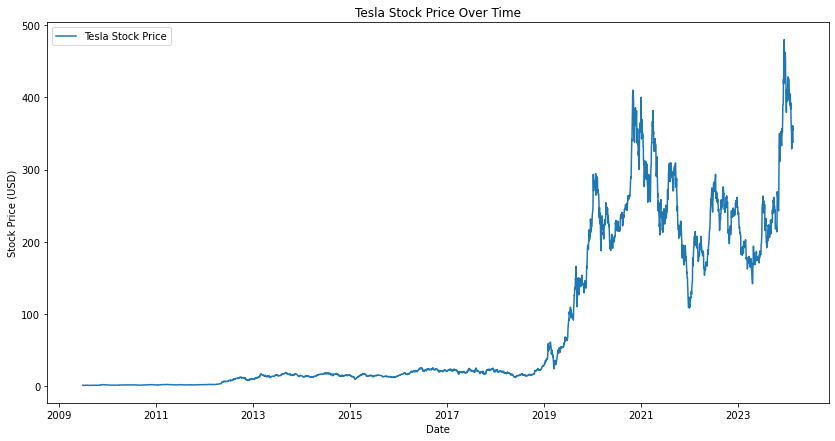

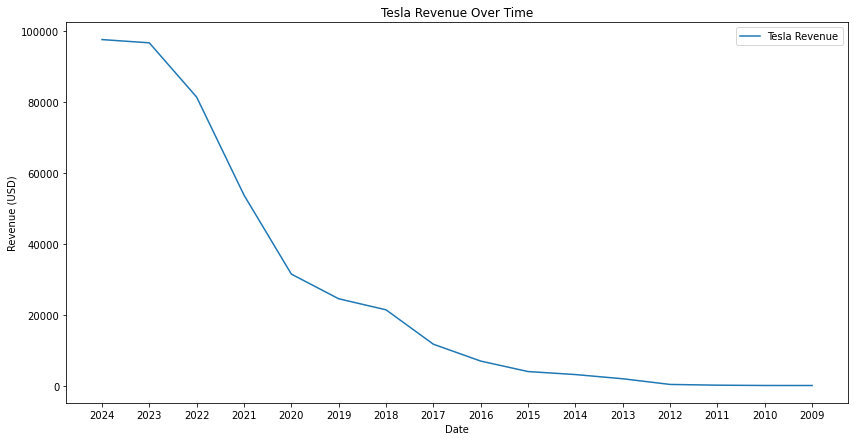

In [29]:
# PRICE
plt.figure(figsize=(14, 7))
plt.plot(tesla_data.index, tesla_data["Close"], label="Tesla Stock Price")
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

#REVENUE
plt.figure(figsize=(14, 7))
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"].astype(float), label="Tesla Revenue")
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.legend()
plt.show()

## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

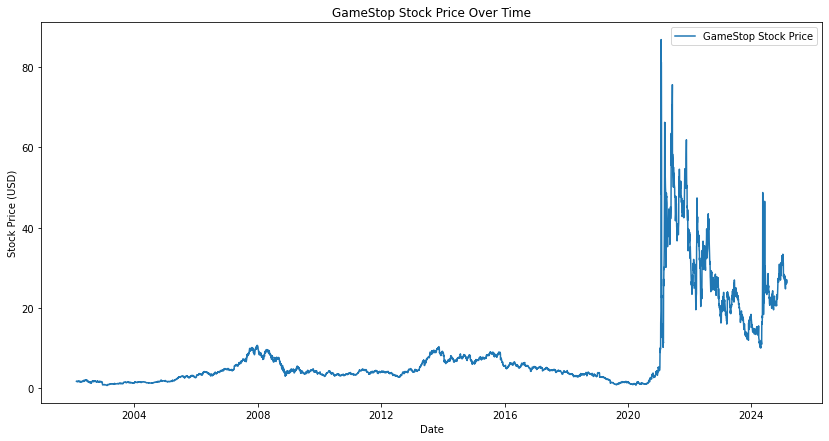

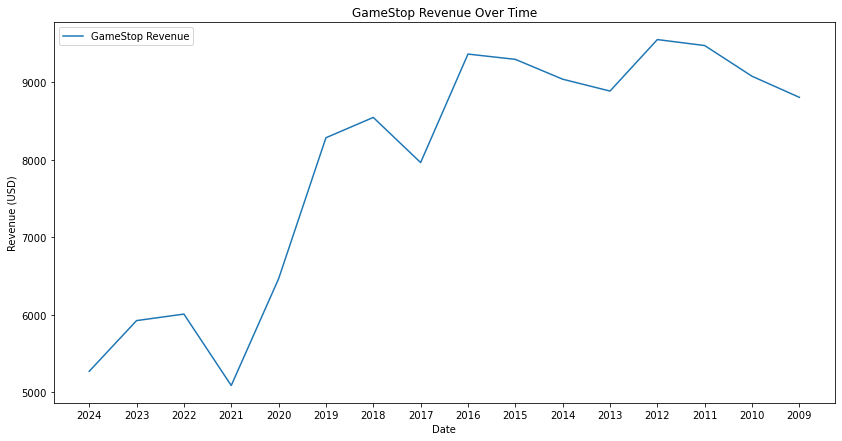

In [32]:
#PRICE
plt.figure(figsize=(14, 7))
plt.plot(gamestop_data.index, gamestop_data["Close"], label="GameStop Stock Price")
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

# REVENUE
plt.figure(figsize=(14, 7))
plt.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"].astype(float), label="GameStop Revenue")
plt.title("GameStop Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.legend()
plt.show()